In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import netCDF4
import cftime
import seaborn
import cmocean

import glob
import pandas

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function w

# 30day runs

import cam 400 data

In [2]:
cont_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm0400.ens_10members/ens_mean_cesm_files/'
cont_filename = 'B_1850_CAM5.30days.cam0400.clm0400.ens.cam.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
cont_cam_ds = xarray.open_dataset(cont_fileroot+cont_filename, decode_times=False)

calculate latitude information

In [3]:
lat_lo = -30.
lat_hi = 30.
lon_lo = 270.
lon_hi = 330.

In [5]:
lat = cont_cam_ds['lat'].values
lon = cont_cam_ds['lon'].values

lat_indices = (lat>=lat_lo)&(lat<=lat_hi)
lon_indices = (lon>=lon_lo)&(lon<=lon_hi)

lat_subset = lat[lat_indices]
lon_subset = lon[lon_indices]

get land fraction info

In [6]:
LANDFRAC = cont_cam_ds['LANDFRAC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values[0,:,:]

get 400 fields for cam

In [45]:
PRECC_400_30d = cont_cam_ds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_400_30d = cont_cam_ds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

import cam 1000 data

In [46]:
phys_fileroot = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.30days.cam0400.clm1000.ens_10members/ens_mean_cesm_files/'
phys_filename = 'B_1850_CAM5.30days.cam0400.clm1000.ens.cam.h0.0011-03-20-0000_0011-04-20-0000_ens_mean.nc'
phys_cam_ds = xarray.open_dataset(phys_fileroot+phys_filename, decode_times=False)

get 1000 fields for cam

In [47]:
PRECC_1000_30d = phys_cam_ds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_1000_30d = phys_cam_ds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values

convert time information

In [12]:
time_400 = cont_cam_ds['time']
time_converted = netCDF4.num2date(time_400.values, time_400.units, time_400.calendar)

time_manual = []
for t_idx in range(time_converted.size):
    year=time_converted[t_idx].year
    month=time_converted[t_idx].month
    day=time_converted[t_idx].day
    hour=time_converted[t_idx].hour
    minute=time_converted[t_idx].minute
    hour_round = round(hour+minute/60)
    time_manual.append(cftime.DatetimeNoLeap(year,month,day,hour_round))

specify timing

In [18]:
skip_time = 24
#end_time = 745

calculate PRECT diffs

In [48]:
PRECT_400_30d = PRECC_400_30d+PRECL_400_30d
PRECT_1000_30d = PRECC_1000_30d+PRECL_1000_30d

In [49]:
PRECT_1000_timemean_10day = numpy.mean(PRECT_1000_30d[skip_time:240,:,:], axis=0)
PRECT_1000_timemean_10day_landmask = numpy.copy(PRECT_1000_timemean_10day)
PRECT_1000_timemean_10day_landmask[LANDFRAC==0] = numpy.nan

PRECT_400_timemean_10day = numpy.nanmean(PRECT_400_30d[skip_time:240,:,:], axis=0)
PRECT_400_timemean_10day_landmask = numpy.copy(PRECT_400_timemean_10day)
PRECT_400_timemean_10day_landmask[LANDFRAC==0] = numpy.nan

In [50]:
PRECT_1000_timemean_30day = numpy.mean(PRECT_1000_30d[skip_time:,:,:], axis=0)
PRECT_1000_timemean_30day_landmask = numpy.copy(PRECT_1000_timemean_30day)
PRECT_1000_timemean_30day_landmask[LANDFRAC==0] = numpy.nan

PRECT_400_timemean_30day = numpy.nanmean(PRECT_400_30d[skip_time:,:,:], axis=0)
PRECT_400_timemean_30day_landmask = numpy.copy(PRECT_400_timemean_30day)
PRECT_400_timemean_30day_landmask[LANDFRAC==0] = numpy.nan

# 10year simulations

400 clm runs

In [20]:
data_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.10years.cam0400.clm0400/'
cont_cam_mfds = xarray.open_mfdataset(data_dir + 'atm/hist/*.nc', decode_times=False)

In [51]:
PRECC_400_10y = cont_cam_mfds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_400_10y = cont_cam_mfds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECT_400_10y = PRECC_400_10y+PRECL_400_10y

1000 clm runs

In [22]:
data_dir = '/beegfs/DATA/pritchard/blangenb/CESM_ARCHIVE/B_1850_CAM5.10years.cam0400.clm1000/'
phys_cam_mfds = xarray.open_mfdataset(data_dir + 'atm/hist/*.nc')#, decode_times=False)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [52]:
PRECC_1000_10y = phys_cam_mfds['PRECC'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECL_1000_10y = phys_cam_mfds['PRECL'].sel(lat=slice(lat_lo,lat_hi),lon=slice(lon_lo,lon_hi)).values
PRECT_1000_10y = PRECC_1000_10y+PRECL_1000_10y

take time averages

In [53]:
PRECT_400_timemean_10year = numpy.mean(PRECT_400_10y, axis=0)
PRECT_1000_timemean_10year = numpy.mean(PRECT_1000_10y, axis=0)

In [54]:
PRECT_400_timemean_10year_landmask = numpy.copy(PRECT_400_timemean_10year)
PRECT_1000_timemean_10year_landmask = numpy.copy(PRECT_1000_timemean_10year)

PRECT_400_timemean_10year_landmask[LANDFRAC==0] = numpy.nan
PRECT_1000_timemean_10year_landmask[LANDFRAC==0] = numpy.nan

# calculate all differences

In [55]:
PRECT_diffs_10day = PRECT_1000_timemean_10day_landmask-PRECT_400_timemean_10day_landmask
PRECT_diffs_30day = PRECT_1000_timemean_30day_landmask-PRECT_400_timemean_30day_landmask
PRECT_diffs_10year = PRECT_1000_timemean_10year_landmask-PRECT_400_timemean_10year_landmask

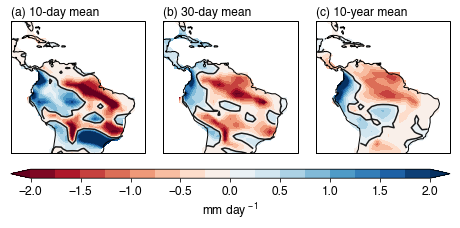

In [75]:
fontsize=12

fig = mp.figure(figsize=(6.5,2.5))

map_proj = cartopy.crs.PlateCarree()

ax1 = fig.add_subplot(131, projection=map_proj)
ax2 = fig.add_subplot(132, projection=map_proj)
ax3 = fig.add_subplot(133, projection=map_proj)

levels1 = numpy.arange(-2,2.1,0.25)

contour1 = ax1.contourf(lon_subset, lat_subset, PRECT_diffs_10day*86400.*1000, levels=levels1, cmap='RdBu', extend='both')
ax1.contour(lon_subset, lat_subset, PRECT_diffs_10day, levels=[0], colors='0.1')

contour2 = ax2.contourf(lon_subset, lat_subset, PRECT_diffs_30day*86400.*1000, levels=levels1, cmap='RdBu', extend='both')
ax2.contour(lon_subset, lat_subset, PRECT_diffs_30day, levels=[0], colors='0.1')

contour3 = ax3.contourf(lon_subset, lat_subset, PRECT_diffs_10year*86400.*1000, levels=levels1, cmap='RdBu', extend='both')
ax3.contour(lon_subset, lat_subset, PRECT_diffs_10year, levels=[0], colors='0.1')

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()

ax1.text(s='(a) 10-day mean', x=0, y=1.02, transform=ax1.transAxes, fontsize=fontsize, ha='left', va='bottom')
ax2.text(s='(b) 30-day mean', x=0, y=1.02, transform=ax2.transAxes, fontsize=fontsize, ha='left', va='bottom')
ax3.text(s='(c) 10-year mean', x=0, y=1.02, transform=ax3.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()

cbar_ax = fig.add_axes([ax1pos.x0,ax1pos.y0-0.065,ax3pos.x1-ax1pos.x0,0.05])
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.savefig('cesm_10day_30day_10year_mean_precip_change.png', dpi=600, bbox_inches='tight', transparent=True)
